In [5]:
import qiskit
from qiskit import QuantumCircuit, Aer, execute, transpile
from qiskit.circuit.library import QFT
from qiskit.visualization import circuit_drawer, plot_histogram

In [6]:
n_qubit = 5

In [7]:
qc = QuantumCircuit(n_qubit, n_qubit)

In [8]:
qc.x(4)
qc.x(2)
qc.x(0)
qft_circuit = QFT(num_qubits=5, approximation_degree=0, do_swaps=True, inverse=False, name='QFT')
qc.compose(qft_circuit, inplace=True)

In [9]:
qc.measure(range(5), range(5))

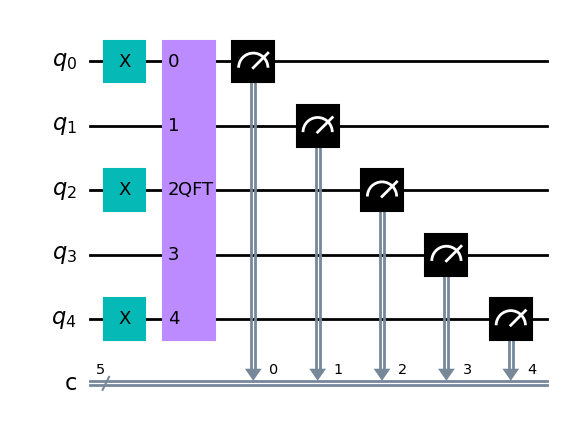

In [10]:
circuit_drawer(qc, output='mpl')

In [12]:
backend = Aer.get_backend('qasm_simulator')
tranpiled_qc = transpile(qc, backend)

job = execute(tranpiled_qc, backend=backend, shots=1024)
result = job.result()
counts = result.get_counts()

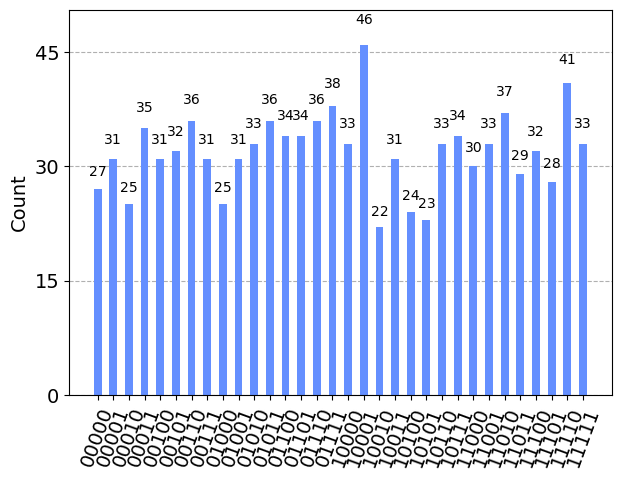

In [13]:
plot_histogram(counts)